In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
combined = pd.merge(ride_df, city_df, on="city")
# Display the data table for preview
combined.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban
5,Lake Jonathanshire,2018-04-06 11:30:32,16.84,6164453571846,5,Urban
6,Lake Jonathanshire,2018-03-21 00:18:34,37.95,8353656732934,5,Urban
7,Lake Jonathanshire,2018-01-28 00:07:00,5.67,9756573174778,5,Urban
8,Lake Jonathanshire,2018-01-24 12:24:22,34.65,3319117904437,5,Urban
9,Lake Jonathanshire,2018-03-24 16:27:49,14.94,1670908453476,5,Urban


## Bubble Plot of Ride Sharing Data

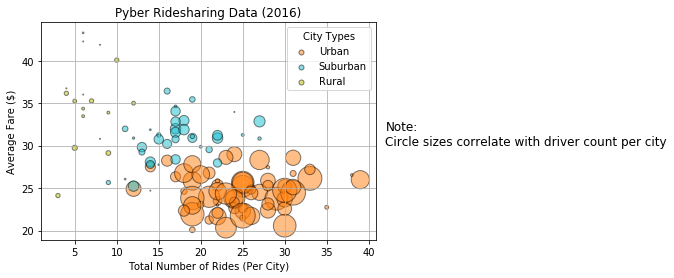

In [2]:
# Obtain the x and y coordinates for each of the three city types
urban = combined[combined["type"]=="Urban"].groupby("city")
urb_x_values = urban["type"].count()
urb_y_values = urban["fare"].mean()
urb_s_values = urban["driver_count"].first()
suburban = combined[combined["type"]=="Suburban"].groupby("city")
sub_x_values = suburban["type"].count()
sub_y_values = suburban["fare"].mean()
sub_s_values = suburban["driver_count"].first()
rural = combined[combined["type"]=="Rural"].groupby("city")
rur_x_values = rural["type"].count()
rur_y_values = rural["fare"].mean()
rur_s_values = rural["driver_count"].first()
# Build the scatter plots for each city types
urb = plt.scatter(urb_x_values, urb_y_values, marker="o", s= urb_s_values**1.5, c='tab:orange', alpha=0.5, edgecolors = "black", label="Urban")
sub = plt.scatter(sub_x_values, sub_y_values, marker="o", s= sub_s_values**1.5, c='tab:cyan', alpha=0.5, edgecolors = "black", label="Suburban")
rur = plt.scatter(rur_x_values, rur_y_values, marker="o", s= rur_s_values**1.5, c='y', alpha=0.5, edgecolors = "black", label="Rural")
# Incorporate the other graph properties
plt.grid()
plt.title("Pyber Ridesharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
lgnd=plt.legend(handles=[urb, sub, rur], title="City Types", loc="best", markerscale = 2)
lgnd.legendHandles[0]._sizes = [25]
lgnd.legendHandles[1]._sizes = [25]
lgnd.legendHandles[2]._sizes = [25]
# Incorporate a text label regarding circle size
textstr = "Note:\nCircle sizes correlate with driver count per city"
plt.text(42, 30, textstr, fontsize=12)
# Save Figure
plt.savefig("Avg Fare Bubble.png", figsize=(8,4))
plt.show()

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

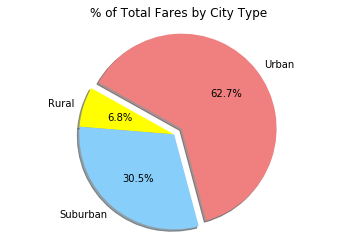

In [4]:
# Calculate Type Percents
total_fare = combined["fare"].sum()
urb_fares = combined[combined["type"]=="Urban"]["fare"].sum()/total_fare*100
sub_fares = combined[combined["type"]=="Suburban"]["fare"].sum()/total_fare*100
rur_fares = combined[combined["type"]=="Rural"]["fare"].sum()/total_fare*100
# Build Pie Chart
labels = ["Urban", "Rural", "Suburban"]
values = [urb_fares, rur_fares, sub_fares]
colors = ["lightcoral", "yellow", "lightskyblue"]
explode = (0.1,0,0)
plt.pie(values, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=-75)
plt.axis("equal")
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("Total Fares Pie.png")

In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

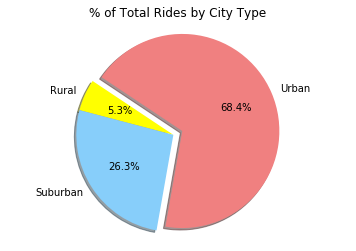

In [6]:
# Calculate Ride Percents
urb_rides = combined[combined["type"]=="Urban"]["fare"].count()
sub_rides = combined[combined["type"]=="Suburban"]["fare"].count()
rur_rides = combined[combined["type"]=="Rural"]["fare"].count()
# Build Pie Chart
labels = ["Urban", "Rural", "Suburban"]
values = [urb_rides, rur_rides, sub_rides]
colors = ["lightcoral", "yellow", "lightskyblue"]
explode = (0.1,0,0)
plt.pie(values, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=-100)
plt.axis("equal")
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("Total Rides Pie.png")

In [7]:
# Show Figure
plt.show()

## Total Drivers by City Type

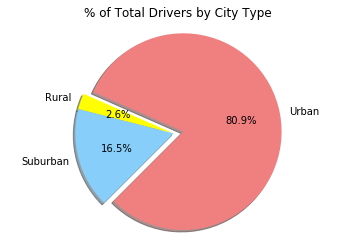

In [8]:
# Calculate Driver Percents
urb_drivers = urban["driver_count"].first()
urb_dr = urb_drivers.sum()
sub_drivers = suburban["driver_count"].first()
sub_dr = sub_drivers.sum()
rur_drivers = rural["driver_count"].first()
rur_dr = rur_drivers.sum()
# Build Pie Charts
labels3 = ["Urban", "Rural", "Suburban"]
values3 = [urb_dr, rur_dr, sub_dr]
colors3 = ["lightcoral", "yellow", "lightskyblue"]
explode3 = (0.1,0,0)
plt.pie(values3, explode=explode3, labels=labels3, colors=colors3,
        autopct="%1.1f%%", shadow=True, startangle=225)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("Total Drivers Pie.png")